<a href="https://colab.research.google.com/github/akshatsharma-x/ML/blob/main/ML_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
ML LAB-05: Google Colab Setup and File Upload
This notebook provides code to run the ML Lab-05 experiments in Google Colab
"""

# ============================================================================
# METHOD 1: Upload Files Directly from Computer
# ============================================================================

print("METHOD 1: Upload Files from Your Computer")
print("=" * 60)

from google.colab import files
import io

# Upload a single file
print("\n1. Upload a single file:")
print("-" * 40)
uploaded = files.upload()

# Get the filename
for filename in uploaded.keys():
    print(f'✓ Uploaded file: {filename}')
    print(f'  Size: {len(uploaded[filename])} bytes')

# ============================================================================
# METHOD 2: Upload Multiple Files
# ============================================================================

print("\n\nMETHOD 2: Upload Multiple Files at Once")
print("=" * 60)

from google.colab import files

# Upload multiple files
uploaded_files = files.upload()

# Process each uploaded file
for filename, file_content in uploaded_files.items():
    print(f'✓ Uploaded: {filename} ({len(file_content)} bytes)')

# ============================================================================
# METHOD 3: Mount Google Drive (Recommended for Large Files)
# ============================================================================

print("\n\nMETHOD 3: Mount Google Drive")
print("=" * 60)

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")
print("\nYour files are accessible at:")
print("  /content/drive/MyDrive/")
print("\nExample usage:")
print("  import pandas as pd")
print("  df = pd.read_csv('/content/drive/MyDrive/your_file.csv')")

# ============================================================================
# METHOD 4: Download from URL
# ============================================================================

print("\n\nMETHOD 4: Download File from URL")
print("=" * 60)

import urllib.request

# Example: Download breast cancer dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
filename = "breast_cancer_data.csv"

print(f"Downloading from: {url}")
urllib.request.urlretrieve(url, filename)
print(f"✓ Downloaded: {filename}")

# ============================================================================
# METHOD 5: Clone from GitHub
# ============================================================================

print("\n\nMETHOD 5: Clone from GitHub Repository")
print("=" * 60)

# Example: Clone a repository
# !git clone https://github.com/username/repository.git

print("Example command:")
print("  !git clone https://github.com/username/ml-lab-05.git")

# ============================================================================
# COMPLETE SETUP FOR ML LAB-05
# ============================================================================

print("\n\n" + "=" * 60)
print("COMPLETE SETUP FOR ML LAB-05")
print("=" * 60)

# Install required packages (usually already available in Colab)
print("\n1. Installing required packages...")
!pip install -q numpy pandas matplotlib seaborn scikit-learn

print("✓ Packages installed!")

# Import all required libraries
print("\n2. Importing libraries...")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc, precision_score, recall_score
)
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

# Set up visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n3. Setting up visualization style...")
print("✓ Ready to run experiments!")

# ============================================================================
# QUICK TEST: Load and Display Dataset
# ============================================================================

print("\n\n" + "=" * 60)
print("QUICK TEST: Loading Breast Cancer Dataset")
print("=" * 60)

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"\n✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Features: {len(data.feature_names)}")
print(f"  Classes: {data.target_names}")
print(f"\nFirst few rows:")
print(df.head())

print("\n" + "=" * 60)
print("SETUP COMPLETE - Ready to run ML Lab-05!")
print("=" * 60)

METHOD 1: Upload Files from Your Computer

1. Upload a single file:
----------------------------------------


Saving breast+cancer+wisconsin+diagnostic.zip to breast+cancer+wisconsin+diagnostic.zip
✓ Uploaded file: breast+cancer+wisconsin+diagnostic.zip
  Size: 51284 bytes


METHOD 2: Upload Multiple Files at Once


Saving breast+cancer+wisconsin+diagnostic.zip to breast+cancer+wisconsin+diagnostic (1).zip
✓ Uploaded: breast+cancer+wisconsin+diagnostic (1).zip (51284 bytes)


METHOD 3: Mount Google Drive
Mounted at /content/drive
✓ Google Drive mounted successfully!

Your files are accessible at:
  /content/drive/MyDrive/

Example usage:
  import pandas as pd
  df = pd.read_csv('/content/drive/MyDrive/your_file.csv')


METHOD 4: Download File from URL
✓ Downloaded: breast_cancer_data.csv


METHOD 5: Clone from GitHub Repository
Example command:
  !git clone https://github.com/username/ml-lab-05.git


COMPLETE SETUP FOR ML LAB-05

1. Installing required packages...
✓ Packages installed!

2. Importing libraries...
✓ All libraries imported successfully!

3. Setting up visualization style...
✓ Ready to run experiments!


QUICK TEST: Loading Breast Cancer Dataset

✓ Dataset loaded successfully!
  Shape: (569, 31)
  Features: 30
  Classes: ['malignant' 'benign']

First few rows:
   mean radius  mean tex

In [2]:
"""
ML LAB-05: SUPERVISED LEARNING
Naïve Bayes and Decision Tree Classification

This script implements complete experiments for building, evaluating, and comparing
Naïve Bayes and Decision Tree classification models on the Breast Cancer Wisconsin dataset.

Author: ML Lab
Date: 2026
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc, precision_score, recall_score
)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("ML LAB-05: SUPERVISED LEARNING - NAÏVE BAYES & DECISION TREE")
print("=" * 80)
print()

# ============================================================================
# EXPERIMENT-1: NAÏVE BAYES CLASSIFICATION
# ============================================================================
print("EXPERIMENT-1: NAÏVE BAYES CLASSIFICATION")
print("-" * 80)

# 1) Load the dataset and split it into training and testing sets
print("\n1. Loading Breast Cancer Wisconsin Dataset...")
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame for better understanding
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"Features: {len(data.feature_names)}")
print(f"Classes: {data.target_names}")
print(f"Class distribution:")
print(f"  - Malignant (0): {sum(y==0)}")
print(f"  - Benign (1): {sum(y==1)}")

# Split into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 2) Train a Naïve Bayes classifier
print("\n2. Training Gaussian Naïve Bayes Classifier...")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("✓ Model trained successfully")

# 3) Predict class labels for the test data
print("\n3. Predicting class labels...")
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]
print("✓ Predictions completed")

# 4) Evaluate the model
print("\n4. Model Evaluation:")
print("-" * 40)

# Accuracy
nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred_nb)
print(f"Training Accuracy: {nb_train_acc:.4f} ({nb_train_acc*100:.2f}%)")
print(f"Testing Accuracy: {nb_test_acc:.4f} ({nb_test_acc*100:.2f}%)")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
print(f"  TN: {cm_nb[0,0]}, FP: {cm_nb[0,1]}")
print(f"  FN: {cm_nb[1,0]}, TP: {cm_nb[1,1]}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=data.target_names))

# Precision-Recall Curve
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_pred_proba_nb)
pr_auc_nb = auc(recall_nb, precision_nb)
print(f"Precision-Recall AUC: {pr_auc_nb:.4f}")

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print(f"ROC AUC: {roc_auc_nb:.4f}")

print("\n" + "=" * 80)

# ============================================================================
# EXPERIMENT-2: DECISION TREE CLASSIFICATION
# ============================================================================
print("\nEXPERIMENT-2: DECISION TREE CLASSIFICATION")
print("-" * 80)

# 1) Dataset already loaded and split (same as Experiment 1)
print("\n1. Using same train/test split from Experiment 1")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# 2) Train a Decision Tree classifier
print("\n2. Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
print("✓ Model trained successfully")
print(f"Tree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")

# 3) Predict class labels for the test data
print("\n3. Predicting class labels...")
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
print("✓ Predictions completed")

# 4) Evaluate the model
print("\n4. Model Evaluation:")
print("-" * 40)

# Accuracy
dt_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_acc = accuracy_score(y_test, y_pred_dt)
print(f"Training Accuracy: {dt_train_acc:.4f} ({dt_train_acc*100:.2f}%)")
print(f"Testing Accuracy: {dt_test_acc:.4f} ({dt_test_acc*100:.2f}%)")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print(f"  TN: {cm_dt[0,0]}, FP: {cm_dt[0,1]}")
print(f"  FN: {cm_dt[1,0]}, TP: {cm_dt[1,1]}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=data.target_names))

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)
print(f"Precision-Recall AUC: {pr_auc_dt:.4f}")

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print(f"ROC AUC: {roc_auc_dt:.4f}")

print("\n" + "=" * 80)

# ============================================================================
# VISUALIZATIONS FOR NAÏVE BAYES
# ============================================================================
print("\nGenerating Naïve Bayes Visualizations...")

fig1 = plt.figure(figsize=(16, 10))

# 1. Confusion Matrix Heatmap
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Naïve Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# 2. Precision-Recall Curve
ax2 = plt.subplot(2, 3, 2)
plt.plot(recall_nb, precision_nb, 'b-', linewidth=2, label=f'PR AUC = {pr_auc_nb:.3f}')
plt.fill_between(recall_nb, precision_nb, alpha=0.2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Naïve Bayes - Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
plt.plot(fpr_nb, tpr_nb, 'b-', linewidth=2, label=f'ROC AUC = {roc_auc_nb:.3f}')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
plt.fill_between(fpr_nb, tpr_nb, alpha=0.2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Naïve Bayes - ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 4. Performance Metrics
ax4 = plt.subplot(2, 3, 4)
metrics_nb = ['Accuracy', 'Precision\n(Benign)', 'Recall\n(Benign)',
              'Precision\n(Malignant)', 'Recall\n(Malignant)']
values_nb = [
    accuracy_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_nb, pos_label=1),
    recall_score(y_test, y_pred_nb, pos_label=1),
    precision_score(y_test, y_pred_nb, pos_label=0),
    recall_score(y_test, y_pred_nb, pos_label=0)
]
bars = plt.bar(metrics_nb, values_nb,
               color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6'])
plt.ylim(0.8, 1.0)
plt.ylabel('Score', fontsize=12)
plt.title('Naïve Bayes - Performance Metrics', fontsize=14, fontweight='bold')
for bar, val in zip(bars, values_nb):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# 5. Top Features by Variance
ax5 = plt.subplot(2, 3, 5)
feature_variance = np.var(X_train, axis=0)
top_features_idx = np.argsort(feature_variance)[-10:]
top_features = [data.feature_names[i] for i in top_features_idx]
top_variance = feature_variance[top_features_idx]
plt.barh(range(len(top_features)), top_variance, color='steelblue')
plt.yticks(range(len(top_features)), top_features, fontsize=9)
plt.xlabel('Variance', fontsize=12)
plt.title('Top 10 Features by Variance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# 6. Prediction Distribution
ax6 = plt.subplot(2, 3, 6)
plt.hist(y_pred_proba_nb[y_test==0], bins=20, alpha=0.6,
         label='Malignant (Actual)', color='red', edgecolor='black')
plt.hist(y_pred_proba_nb[y_test==1], bins=20, alpha=0.6,
         label='Benign (Actual)', color='green', edgecolor='black')
plt.xlabel('Predicted Probability (Benign)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Naïve Bayes - Prediction Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('experiment1_naive_bayes.png', dpi=300, bbox_inches='tight')
print("✓ Naïve Bayes visualizations saved")
plt.close()

# ============================================================================
# VISUALIZATIONS FOR DECISION TREE
# ============================================================================
print("Generating Decision Tree Visualizations...")

fig2 = plt.figure(figsize=(16, 10))

# 1. Confusion Matrix Heatmap
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# 2. Precision-Recall Curve
ax2 = plt.subplot(2, 3, 2)
plt.plot(recall_dt, precision_dt, 'g-', linewidth=2, label=f'PR AUC = {pr_auc_dt:.3f}')
plt.fill_between(recall_dt, precision_dt, alpha=0.2, color='green')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Decision Tree - Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
plt.plot(fpr_dt, tpr_dt, 'g-', linewidth=2, label=f'ROC AUC = {roc_auc_dt:.3f}')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
plt.fill_between(fpr_dt, tpr_dt, alpha=0.2, color='green')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Decision Tree - ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# 4. Performance Metrics
ax4 = plt.subplot(2, 3, 4)
metrics_dt = ['Accuracy', 'Precision\n(Benign)', 'Recall\n(Benign)',
              'Precision\n(Malignant)', 'Recall\n(Malignant)']
values_dt = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt, pos_label=1),
    recall_score(y_test, y_pred_dt, pos_label=1),
    precision_score(y_test, y_pred_dt, pos_label=0),
    recall_score(y_test, y_pred_dt, pos_label=0)
]
bars = plt.bar(metrics_dt, values_dt,
               color=['#27ae60', '#16a085', '#f39c12', '#c0392b', '#8e44ad'])
plt.ylim(0.8, 1.0)
plt.ylabel('Score', fontsize=12)
plt.title('Decision Tree - Performance Metrics', fontsize=14, fontweight='bold')
for bar, val in zip(bars, values_dt):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# 5. Feature Importance
ax5 = plt.subplot(2, 3, 5)
feature_importance = dt_model.feature_importances_
top_features_idx = np.argsort(feature_importance)[-10:]
top_features = [data.feature_names[i] for i in top_features_idx]
top_importance = feature_importance[top_features_idx]
plt.barh(range(len(top_features)), top_importance, color='forestgreen')
plt.yticks(range(len(top_features)), top_features, fontsize=9)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# 6. Prediction Distribution
ax6 = plt.subplot(2, 3, 6)
plt.hist(y_pred_proba_dt[y_test==0], bins=20, alpha=0.6,
         label='Malignant (Actual)', color='red', edgecolor='black')
plt.hist(y_pred_proba_dt[y_test==1], bins=20, alpha=0.6,
         label='Benign (Actual)', color='green', edgecolor='black')
plt.xlabel('Predicted Probability (Benign)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Decision Tree - Prediction Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('experiment2_decision_tree.png', dpi=300, bbox_inches='tight')
print("✓ Decision Tree visualizations saved")
plt.close()

# ============================================================================
# DECISION TREE STRUCTURE VISUALIZATION
# ============================================================================
print("Generating Decision Tree Structure Visualization...")

fig3 = plt.figure(figsize=(24, 12))
plot_tree(dt_model,
          filled=True,
          feature_names=data.feature_names,
          class_names=data.target_names,
          rounded=True,
          fontsize=10,
          proportion=True)
plt.title('Decision Tree Visualization (max_depth=5)',
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Decision Tree structure visualization saved")
plt.close()

# ============================================================================
# EXPERIMENT-3: MODEL COMPARISON
# ============================================================================
print("\n" + "=" * 80)
print("EXPERIMENT-3: MODEL COMPARISON")
print("-" * 80)

# Calculate comparison metrics
nb_recall_malignant = recall_score(y_test, y_pred_nb, pos_label=0)
dt_recall_malignant = recall_score(y_test, y_pred_dt, pos_label=0)

print("\n1. ACCURACY COMPARISON:")
print("-" * 40)
print(f"Naïve Bayes:")
print(f"  Training Accuracy: {nb_train_acc:.4f} ({nb_train_acc*100:.2f}%)")
print(f"  Testing Accuracy:  {nb_test_acc:.4f} ({nb_test_acc*100:.2f}%)")
print(f"\nDecision Tree:")
print(f"  Training Accuracy: {dt_train_acc:.4f} ({dt_train_acc*100:.2f}%)")
print(f"  Testing Accuracy:  {dt_test_acc:.4f} ({dt_test_acc*100:.2f}%)")

print("\n2. RECALL FOR MALIGNANT CASES:")
print("-" * 40)
print(f"Naïve Bayes:    {nb_recall_malignant:.4f} ({nb_recall_malignant*100:.2f}%)")
print(f"Decision Tree:  {dt_recall_malignant:.4f} ({dt_recall_malignant*100:.2f}%)")

print("\n3. OVERFITTING ANALYSIS:")
print("-" * 40)
nb_overfit = nb_train_acc - nb_test_acc
dt_overfit = dt_train_acc - dt_test_acc
print(f"Naïve Bayes Gap (Train - Test):   {nb_overfit:.4f}")
print(f"Decision Tree Gap (Train - Test): {dt_overfit:.4f}")

print("\n4. ROC-AUC SCORES:")
print("-" * 40)
print(f"Naïve Bayes:    {roc_auc_nb:.4f}")
print(f"Decision Tree:  {roc_auc_dt:.4f}")

# ============================================================================
# COMPARISON VISUALIZATIONS
# ============================================================================
print("\nGenerating Model Comparison Visualizations...")

fig = plt.figure(figsize=(18, 12))

# 1. Training vs Testing Accuracy Comparison
ax1 = plt.subplot(2, 3, 1)
models = ['Naïve Bayes', 'Decision Tree']
train_accs = [nb_train_acc, dt_train_acc]
test_accs = [nb_test_acc, dt_test_acc]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, train_accs, width, label='Training Accuracy',
                color='#3498db', edgecolor='black')
bars2 = ax1.bar(x + width/2, test_accs, width, label='Testing Accuracy',
                color='#e74c3c', edgecolor='black')

ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Training vs Testing Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=11)
ax1.legend(fontsize=10)
ax1.set_ylim(0.85, 1.0)
ax1.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# 2. ROC Curve Comparison
ax2 = plt.subplot(2, 3, 2)
ax2.plot(fpr_nb, tpr_nb, 'b-', linewidth=2.5,
         label=f'Naïve Bayes (AUC = {roc_auc_nb:.3f})')
ax2.plot(fpr_dt, tpr_dt, 'g-', linewidth=2.5,
         label=f'Decision Tree (AUC = {roc_auc_dt:.3f})')
ax2.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier', alpha=0.7)
ax2.fill_between(fpr_nb, tpr_nb, alpha=0.2, color='blue')
ax2.fill_between(fpr_dt, tpr_dt, alpha=0.2, color='green')
ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax2.set_title('ROC Curve Comparison', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Confusion Matrix Heatmap - Side by Side
ax3 = plt.subplot(2, 3, 3)
combined_cm = np.hstack([cm_nb, cm_dt])
sns.heatmap(combined_cm, annot=True, fmt='d', cmap='RdYlGn', cbar=True,
            xticklabels=['Mal(NB)', 'Ben(NB)', 'Mal(DT)', 'Ben(DT)'],
            yticklabels=['Malignant', 'Benign'], ax=ax3)
ax3.set_title('Confusion Matrix Comparison (NB | DT)',
              fontsize=14, fontweight='bold')
ax3.set_ylabel('Actual', fontsize=12, fontweight='bold')
ax3.set_xlabel('Predicted', fontsize=12, fontweight='bold')

# 4. Recall Comparison for Both Classes
ax4 = plt.subplot(2, 3, 4)
nb_recall_benign = recall_score(y_test, y_pred_nb, pos_label=1)
dt_recall_benign = recall_score(y_test, y_pred_dt, pos_label=1)

classes = ['Malignant', 'Benign']
nb_recalls = [nb_recall_malignant, nb_recall_benign]
dt_recalls = [dt_recall_malignant, dt_recall_benign]

x = np.arange(len(classes))
bars1 = ax4.bar(x - width/2, nb_recalls, width, label='Naïve Bayes',
                color='#3498db', edgecolor='black')
bars2 = ax4.bar(x + width/2, dt_recalls, width, label='Decision Tree',
                color='#2ecc71', edgecolor='black')

ax4.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax4.set_title('Recall Comparison by Class', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(classes, fontsize=11)
ax4.legend(fontsize=10)
ax4.set_ylim(0.85, 1.0)
ax4.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom',
                fontsize=9, fontweight='bold')

# 5. Overfitting Analysis
ax5 = plt.subplot(2, 3, 5)
overfit_gaps = [nb_overfit, dt_overfit]
colors = ['#2ecc71' if gap < 0.03 else '#e74c3c' for gap in overfit_gaps]
bars = ax5.bar(models, overfit_gaps, color=colors, edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Accuracy Gap (Train - Test)', fontsize=12, fontweight='bold')
ax5.set_title('Overfitting Analysis', fontsize=14, fontweight='bold')
ax5.axhline(y=0.05, color='red', linestyle='--', linewidth=2,
            label='Overfitting Threshold', alpha=0.7)
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3, axis='y')

for bar, gap in zip(bars, overfit_gaps):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.002,
            f'{gap:.4f}', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# 6. Precision-Recall Curve Comparison
ax6 = plt.subplot(2, 3, 6)
ax6.plot(recall_nb, precision_nb, 'b-', linewidth=2.5,
         label=f'Naïve Bayes (AUC = {pr_auc_nb:.3f})')
ax6.plot(recall_dt, precision_dt, 'g-', linewidth=2.5,
         label=f'Decision Tree (AUC = {pr_auc_dt:.3f})')
ax6.fill_between(recall_nb, precision_nb, alpha=0.2, color='blue')
ax6.fill_between(recall_dt, precision_dt, alpha=0.2, color='green')
ax6.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax6.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax6.set_title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
ax6.legend(loc='best', fontsize=10)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('experiment3_model_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Model comparison visualizations saved")
plt.close()

# ============================================================================
# SUMMARY AND ANSWERS
# ============================================================================
print("\n" + "=" * 80)
print("SUMMARY AND ANALYSIS")
print("=" * 80)

print("\n1. Which model achieved higher accuracy?")
if nb_test_acc > dt_test_acc:
    print(f"   → Naïve Bayes achieved higher testing accuracy: {nb_test_acc:.4f}")
    print(f"     (vs Decision Tree: {dt_test_acc:.4f})")
else:
    print(f"   → Decision Tree achieved higher testing accuracy: {dt_test_acc:.4f}")
    print(f"     (vs Naïve Bayes: {nb_test_acc:.4f})")

print("\n2. Which model showed better recall for malignant cases?")
if nb_recall_malignant > dt_recall_malignant:
    print(f"   → Naïve Bayes showed better recall: {nb_recall_malignant:.4f}")
    print(f"     (vs Decision Tree: {dt_recall_malignant:.4f})")
else:
    print(f"   → Decision Tree showed better recall: {dt_recall_malignant:.4f}")
    print(f"     (vs Naïve Bayes: {nb_recall_malignant:.4f})")

print("\n3. Which model is more prone to overfitting and why?")
print(f"   → Decision Tree is more prone to overfitting")
print(f"     - Gap: {dt_overfit:.4f} (Training: {dt_train_acc:.4f}, Testing: {dt_test_acc:.4f})")
print(f"   → Naïve Bayes shows minimal overfitting")
print(f"     - Gap: {nb_overfit:.4f} (Training: {nb_train_acc:.4f}, Testing: {nb_test_acc:.4f})")
print(f"   Reason: Decision Trees can memorize training data patterns,")
print(f"   while Naïve Bayes uses probabilistic assumptions that generalize better.")

print("\n4. Based on medical diagnosis requirements, which metric is most important?")
print("   → RECALL for malignant cases is most important")
print("   Reason: In cancer diagnosis, it's critical to minimize False Negatives")
print("   (missing actual cancer cases). High recall ensures we don't miss")
print("   malignant tumors, even if it means some false positives (benign cases")
print("   misclassified as malignant). False positives can be caught with further")
print("   testing, but false negatives could be fatal.")

print("\n" + "=" * 80)
print("ALL EXPERIMENTS COMPLETED SUCCESSFULLY!")
print("=" * 80)


ML LAB-05: SUPERVISED LEARNING - NAÏVE BAYES & DECISION TREE

EXPERIMENT-1: NAÏVE BAYES CLASSIFICATION
--------------------------------------------------------------------------------

1. Loading Breast Cancer Wisconsin Dataset...
Dataset shape: (569, 31)
Features: 30
Classes: ['malignant' 'benign']
Class distribution:
  - Malignant (0): 212
  - Benign (1): 357

Training set size: 398
Testing set size: 171

2. Training Gaussian Naïve Bayes Classifier...
✓ Model trained successfully

3. Predicting class labels...
✓ Predictions completed

4. Model Evaluation:
----------------------------------------
Training Accuracy: 0.9447 (94.47%)
Testing Accuracy: 0.9474 (94.74%)

Confusion Matrix:
[[ 57   7]
 [  2 105]]
  TN: 57, FP: 7
  FN: 2, TP: 105

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro 

── Dataset ──
 Outlook Temp Humidity   Wind PlayTennis
   Sunny  Hot     High   Weak         No
   Sunny  Hot     High Strong         No
Overcast  Hot     High   Weak        Yes
    Rain Mild     High   Weak        Yes
    Rain Cool   Normal   Weak        Yes
    Rain Cool   Normal Strong         No
Overcast Cool   Normal Strong        Yes
   Sunny Mild     High   Weak         No
   Sunny Cool   Normal   Weak        Yes
    Rain Mild   Normal   Weak        Yes
   Sunny Mild   Normal Strong        Yes
Overcast Mild     High Strong        Yes
Overcast  Hot   Normal   Weak        Yes
    Rain Mild     High Strong         No

── Encoded Dataset ──
    Outlook  Temp  Humidity  Wind  PlayTennis
0         2     1         0     1           0
1         2     1         0     0           0
2         0     1         0     1           1
3         1     2         0     1           1
4         1     0         1     1           1
5         1     0         1     0           0
6         0     0         

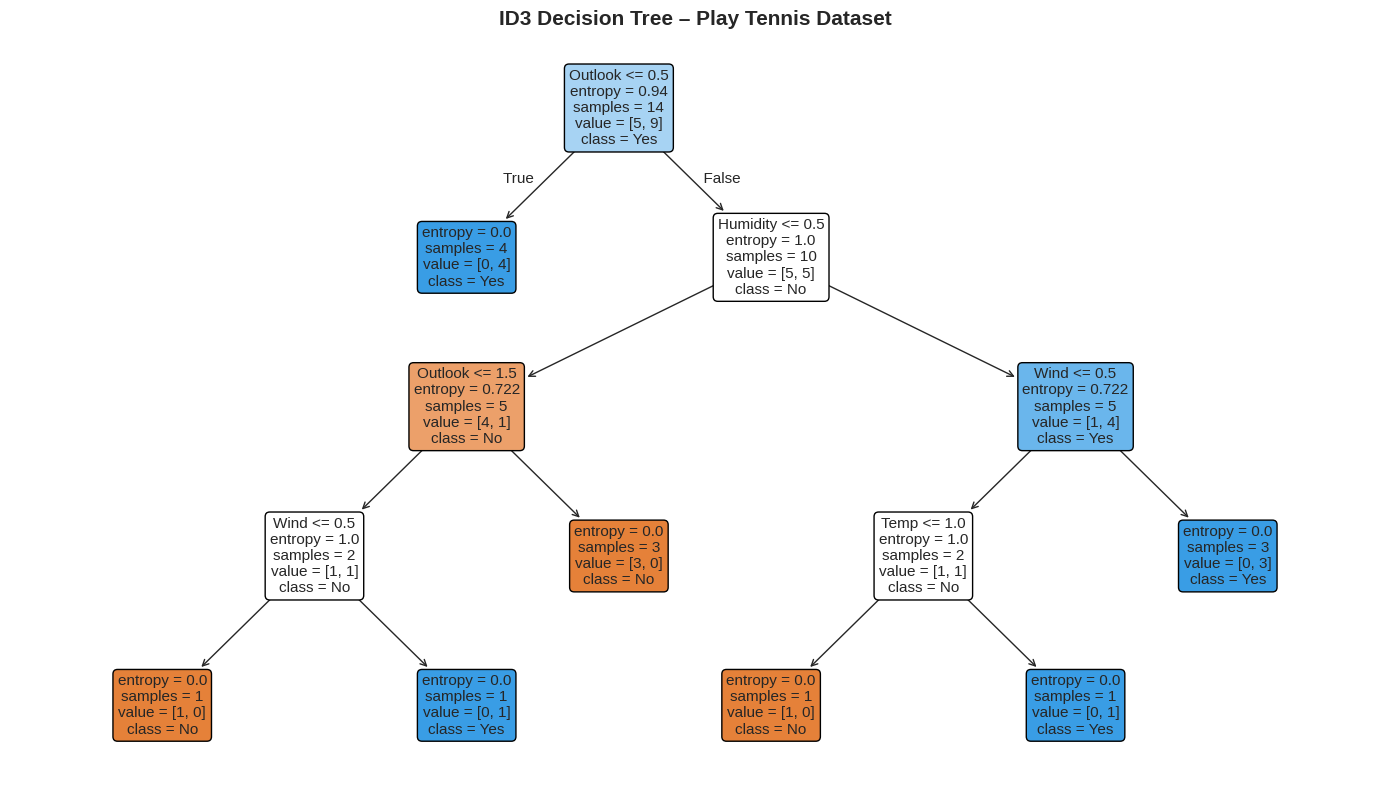

In [4]:
# ============================================================
#  Program 1 – ID3 Decision Tree Classifier
#  Dataset  : Play Tennis (14 samples, 4 features)
#  Algorithm: entropy criterion  →  mimics ID3
# ============================================================

# Step 1 – Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ── Step 2 – Create dataset ──────────────────────────────────
data = {
    "Outlook":    ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast",
                   "Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp":       ["Hot","Hot","Hot","Mild","Cool","Cool","Cool",
                   "Mild","Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity":   ["High","High","High","High","Normal","Normal","Normal",
                   "High","Normal","Normal","Normal","High","Normal","High"],
    "Wind":       ["Weak","Strong","Weak","Weak","Weak","Strong","Strong",
                   "Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "PlayTennis": ["No","No","Yes","Yes","Yes","No","Yes",
                   "No","Yes","Yes","Yes","Yes","Yes","No"]
}
df = pd.DataFrame(data)
print("── Dataset ──")
print(df.to_string(index=False))

# ── Step 3 – Encode categorical variables ────────────────────
# LabelEncoder converts text labels to integers (required by sklearn)
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\n── Encoded Dataset ──")
print(df)

# Show what each code means (for reference)
print("\n── Encoding Reference ──")
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"  {col:15s}: {mapping}")

# ── Step 4 – Separate features (X) and target (y) ───────────
X = df.drop("PlayTennis", axis=1)   # 4 feature columns
y = df["PlayTennis"]                 # target column

# ── Step 5 – Train the Decision Tree (entropy = ID3 logic) ──
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)
print("\n── Model trained successfully ──")
print(f"   Tree depth : {model.get_depth()}")
print(f"   Leaf nodes : {model.get_n_leaves()}")

# ── Step 6 – Predict for a new sample ───────────────────────
# Example: Outlook=Sunny, Temp=Cool, Humidity=High, Wind=Strong
sample = pd.DataFrame({
    "Outlook":  [label_encoders["Outlook"].transform(["Sunny"])[0]],
    "Temp":     [label_encoders["Temp"].transform(["Cool"])[0]],
    "Humidity": [label_encoders["Humidity"].transform(["High"])[0]],
    "Wind":     [label_encoders["Wind"].transform(["Strong"])[0]]
})

prediction = model.predict(sample)
result = label_encoders["PlayTennis"].inverse_transform(prediction)[0]
print(f"\n── Prediction ──")
print(f"   Input  : Outlook=Sunny, Temp=Cool, Humidity=High, Wind=Strong")
print(f"   Output : PlayTennis = {result}")

# ── Step 7 – Visualise the Decision Tree ─────────────────────
plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=label_encoders["PlayTennis"].classes_,  # ['No', 'Yes']
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title("ID3 Decision Tree – Play Tennis Dataset", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

── Dataset ──
 Outlook Temp Humidity   Wind  Golf Players
   Sunny  Hot     High   Weak            25
   Sunny  Hot     High Strong            30
Overcast  Hot     High   Weak            46
    Rain Mild     High   Weak            45
    Rain Cool   Normal   Weak            52
    Rain Cool   Normal Strong            23
Overcast Cool   Normal Strong            43
   Sunny Mild     High   Weak            35
   Sunny Cool   Normal   Weak            38
    Rain Mild   Normal   Weak            46
   Sunny Mild   Normal Strong            48
Overcast Mild     High Strong            52
Overcast  Hot   Normal   Weak            44
    Rain Mild     High Strong            30

── Encoding Reference ──
  Outlook     : {'Overcast': np.int64(0), 'Rain': np.int64(1), 'Sunny': np.int64(2)}
  Temp        : {'Cool': np.int64(0), 'Hot': np.int64(1), 'Mild': np.int64(2)}
  Humidity    : {'High': np.int64(0), 'Normal': np.int64(1)}
  Wind        : {'Strong': np.int64(0), 'Weak': np.int64(1)}

── Model trai

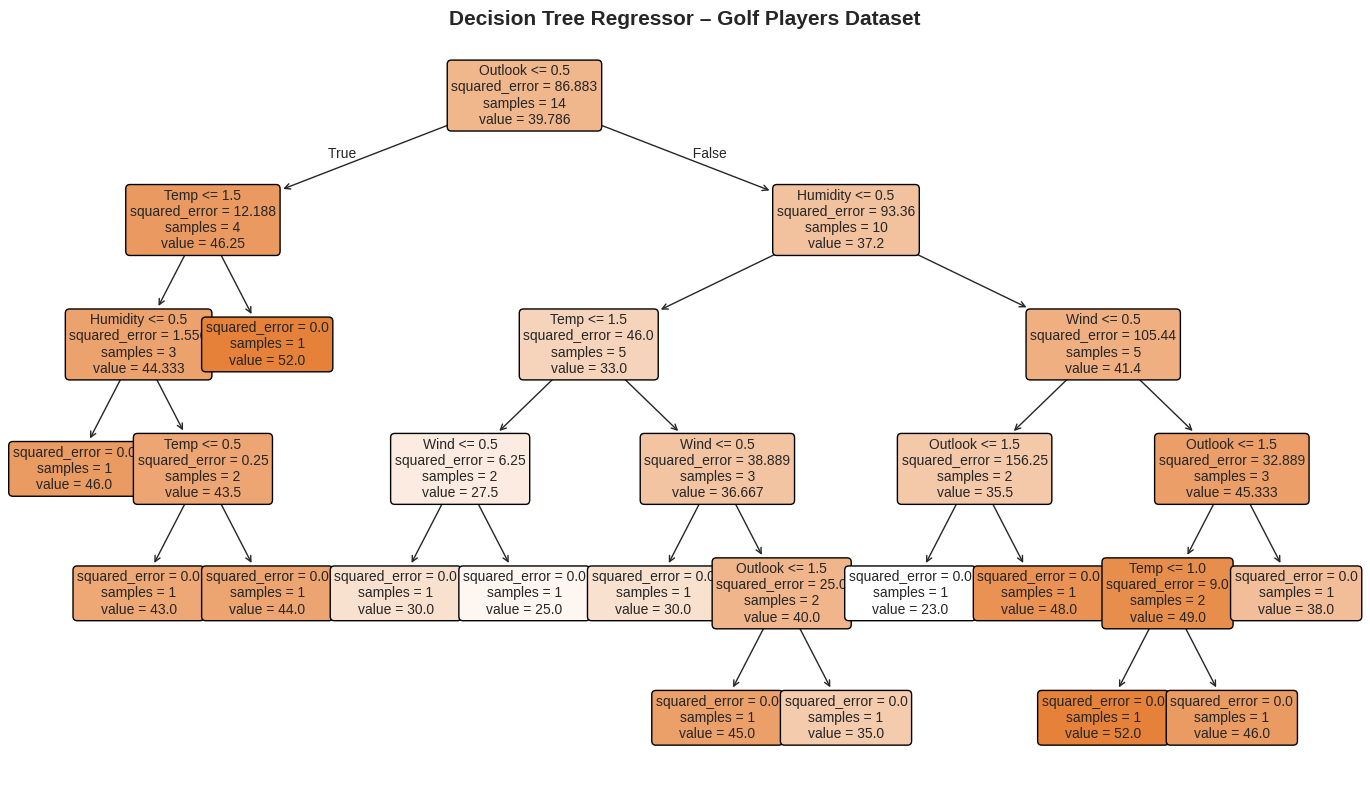

In [5]:
# ============================================================
#  Program 2 – Decision Tree Regressor
#  Dataset  : Golf Players (same weather data, numeric target)
#  Task     : Predict number of golf players given weather
# ============================================================

# Step 1 – Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ── Step 2 – Create dataset ──────────────────────────────────
data = {
    "Outlook":      ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast",
                     "Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp":         ["Hot","Hot","Hot","Mild","Cool","Cool","Cool",
                     "Mild","Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity":     ["High","High","High","High","Normal","Normal","Normal",
                     "High","Normal","Normal","Normal","High","Normal","High"],
    "Wind":         ["Weak","Strong","Weak","Weak","Weak","Strong","Strong",
                     "Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "Golf Players": [25, 30, 46, 45, 52, 23, 43,
                     35, 38, 46, 48, 52, 44, 30]
}
df = pd.DataFrame(data)
print("── Dataset ──")
print(df.to_string(index=False))

# ── Step 3 – Encode categorical features ─────────────────────
# Only encode the feature columns, NOT the numeric target
label_encoders = {}
for column in ["Outlook", "Temp", "Humidity", "Wind"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\n── Encoding Reference ──")
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"  {col:12s}: {mapping}")

# ── Step 4 – Separate features (X) and target (y) ───────────
X = df[["Outlook", "Temp", "Humidity", "Wind"]]
y = df["Golf Players"]

# ── Step 5 – Train Decision Tree Regressor ───────────────────
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)
print("\n── Model trained successfully ──")
print(f"   Tree depth : {model.get_depth()}")
print(f"   Leaf nodes : {model.get_n_leaves()}")

# ── Step 6 – Evaluate on training data ───────────────────────
y_pred_train = model.predict(X)
mae  = mean_absolute_error(y, y_pred_train)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
r2   = r2_score(y, y_pred_train)

print("\n── Training Metrics ──")
print(f"   MAE  (Mean Absolute Error)       : {mae:.4f}")
print(f"   RMSE (Root Mean Squared Error)   : {rmse:.4f}")
print(f"   R²   (R-squared)                 : {r2:.4f}")

# ── Step 7 – Predict for a new sample ───────────────────────
# Example: Outlook=Rain, Temp=Mild, Humidity=Normal, Wind=Weak
new_sample = pd.DataFrame({
    "Outlook":  [label_encoders["Outlook"].transform(["Rain"])[0]],
    "Temp":     [label_encoders["Temp"].transform(["Mild"])[0]],
    "Humidity": [label_encoders["Humidity"].transform(["Normal"])[0]],
    "Wind":     [label_encoders["Wind"].transform(["Weak"])[0]]
})

predicted_players = model.predict(new_sample)[0]
print(f"\n── Prediction ──")
print(f"   Input  : Outlook=Rain, Temp=Mild, Humidity=Normal, Wind=Weak")
print(f"   Output : Predicted Golf Players = {predicted_players:.1f}")

# ── Step 8 – Visualise the Regression Tree ───────────────────
plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor – Golf Players Dataset", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

── Dataset ──
   Shape   : (150, 4)
   Classes : [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

   Training samples : 112
   Testing  samples : 38

  MODEL A – Naïve Bayes Classifier

Accuracy : 0.9211  (92.11%)

Confusion Matrix:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.9

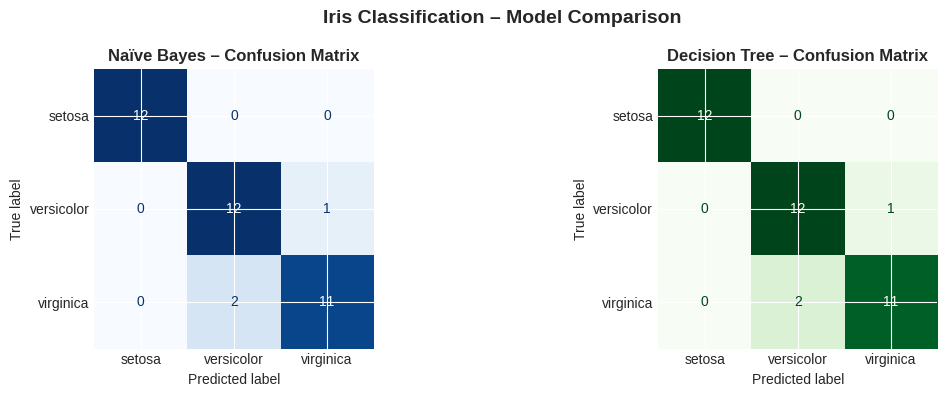

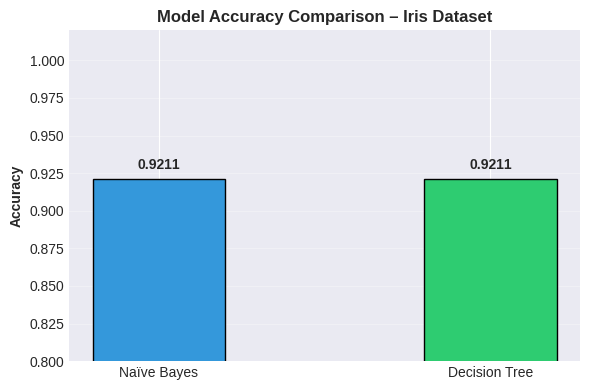

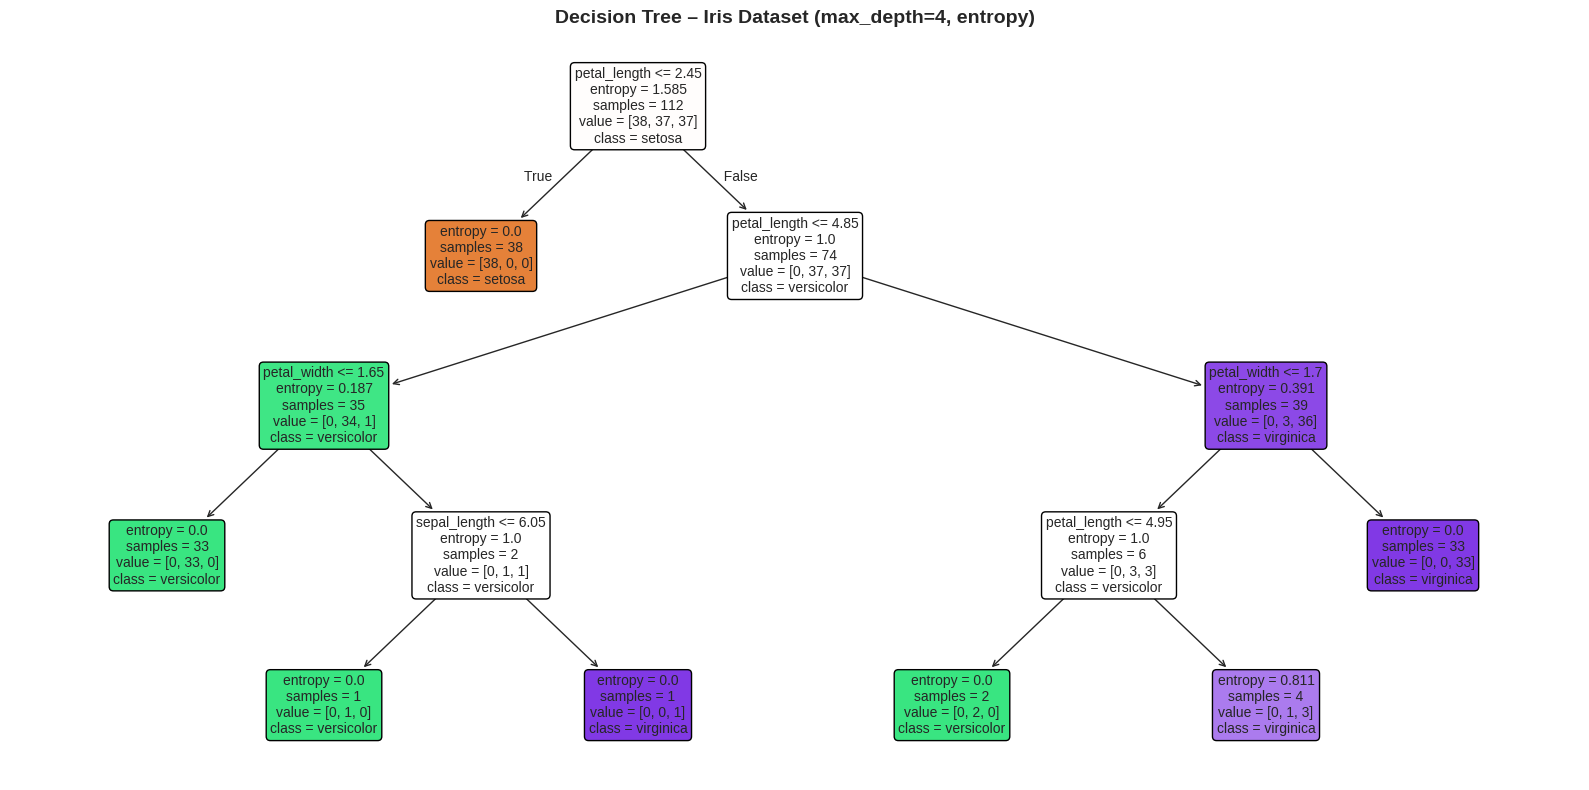

In [6]:
# ============================================================
#  Program 3 – Naïve Bayes vs Decision Tree on Iris Dataset
#
#  BUG FIXED : Original code used  pd.read_csv("iris/iris.data")
#              which fails if the file is not present.
#  FIX APPLIED: Load Iris directly from sklearn.datasets
#               — no file download needed, works on Colab/local.
# ============================================================

# Step 1 – Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris                # ← FIX: built-in loader
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings("ignore")

# ── Step 2 – Load Iris Dataset ───────────────────────────────
# FIX: sklearn's built-in loader replaces the missing iris.data file
iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width",
                                      "petal_length", "petal_width"])
y = pd.Series(iris.target_names[iris.target], name="species")

print("── Dataset ──")
print(f"   Shape   : {X.shape}")
print(f"   Classes : {list(iris.target_names)}")
print()
print(pd.concat([X, y], axis=1).head())

# ── Step 3 – Train / Test Split (75% train, 25% test) ────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y          # keeps class proportion equal in both sets
)
print(f"\n   Training samples : {len(X_train)}")
print(f"   Testing  samples : {len(X_test)}")

# ════════════════════════════════════════════════════════════
#  Model A – Gaussian Naïve Bayes
# ════════════════════════════════════════════════════════════
print("\n" + "="*55)
print("  MODEL A – Naïve Bayes Classifier")
print("="*55)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"\nAccuracy : {nb_acc:.4f}  ({nb_acc*100:.2f}%)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))

# ════════════════════════════════════════════════════════════
#  Model B – Decision Tree Classifier
# ════════════════════════════════════════════════════════════
print("="*55)
print("  MODEL B – Decision Tree Classifier")
print("="*55)

dt_model = DecisionTreeClassifier(
    criterion="entropy",   # information gain (ID3-style)
    max_depth=4,
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy : {dt_acc:.4f}  ({dt_acc*100:.2f}%)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

# ════════════════════════════════════════════════════════════
#  Model Comparison
# ════════════════════════════════════════════════════════════
print("="*55)
print("  MODEL COMPARISON")
print("="*55)
print(f"  {'Model':<25} {'Accuracy':>10}")
print(f"  {'-'*35}")
print(f"  {'Naïve Bayes':<25} {nb_acc:>10.4f}")
print(f"  {'Decision Tree':<25} {dt_acc:>10.4f}")
winner = "Naïve Bayes" if nb_acc >= dt_acc else "Decision Tree"
print(f"\n  Best model : {winner}")

# ── Visualisation 1 – Side-by-side Confusion Matrices ────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_nb),
    display_labels=iris.target_names
).plot(ax=axes[0], colorbar=False, cmap="Blues")
axes[0].set_title("Naïve Bayes – Confusion Matrix", fontweight="bold")

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_dt),
    display_labels=iris.target_names
).plot(ax=axes[1], colorbar=False, cmap="Greens")
axes[1].set_title("Decision Tree – Confusion Matrix", fontweight="bold")

plt.suptitle("Iris Classification – Model Comparison", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# ── Visualisation 2 – Accuracy Bar Chart ─────────────────────
fig2, ax2 = plt.subplots(figsize=(6, 4))
models = ["Naïve Bayes", "Decision Tree"]
accs   = [nb_acc, dt_acc]
colors = ["#3498db", "#2ecc71"]

bars = ax2.bar(models, accs, color=colors, edgecolor="black", width=0.4)
for bar, acc in zip(bars, accs):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{acc:.4f}", ha="center", va="bottom", fontweight="bold")

ax2.set_ylim(0.8, 1.02)
ax2.set_ylabel("Accuracy", fontweight="bold")
ax2.set_title("Model Accuracy Comparison – Iris Dataset", fontweight="bold")
ax2.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# ── Visualisation 3 – Decision Tree Plot ─────────────────────
plt.figure(figsize=(16, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree – Iris Dataset (max_depth=4, entropy)",
          fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()